In [1]:
#pip install keras

In [2]:
#pip install pillow

In [3]:
#pip install --upgrade tensorflow

In [4]:
#pip install --upgrade numpy

In [5]:
#pip install fastapi

In [6]:
#pip install kaleido

In [7]:
#pip install python-multipart

In [8]:
#pip install uvicorn

In [9]:
#pip install --upgrade numpy


In [10]:
import numpy as np
import os
import keras
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from PIL import Image
from keras.layers import Conv2D, Flatten, Dense, Dropout, BatchNormalization, MaxPooling2D
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib as mpl
from keras.preprocessing import image

C:\Users\SDI\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [11]:
mpl.rcParams['figure.figsize'] = (8, 8)
mpl.rcParams['axes.grid'] = False

In [12]:
#pip install tensorflow

In [13]:
#pip install typing-extensions==4.5.0


In [14]:
#pip install --upgrade typing-extensions


In [15]:
#pip install --upgrade tensorflow-probability


In [16]:
#pip install --upgrade fastapi

In [17]:
#from google.colab import drive
#drive.mount('/content/drive')

In [18]:
#from google.colab import files

In [19]:
#uploaded = files.upload()

In [20]:


path1 = []
path2 = []
path3 = []
path4 = []

for dirname, _, filenames in os.walk('Non Demented'):
    for filename in filenames:
        path1.append(os.path.join(dirname, filename))

for dirname, _, filenames in os.walk('Mild Dementia'):
    for filename in filenames:
        path2.append(os.path.join(dirname, filename))

for dirname, _, filenames in os.walk('Moderate Dementia'):
    for filename in filenames:
        path3.append(os.path.join(dirname, filename))

for dirname, _, filenames in os.walk('Very mild Dementia'):
    for filename in filenames:
        path4.append(os.path.join(dirname, filename))




In [21]:
path1 = path1[:100]
path2 = path2[:100]
path3 = path3[:100]
path4 = path4[:100]

In [22]:
encoder = OneHotEncoder()
encoder.fit([[0],[1],[2],[3]])

OneHotEncoder()

In [23]:
data = []
result = []
for path in path1:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

for path in path2:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

for path in path3:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[2]]).toarray())

for path in path4:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[3]]).toarray())

In [24]:
data = np.array(data)
data.shape

(400, 128, 128, 3)

In [25]:
result = np.array(result)
result = result.reshape((400,4))
result.shape

(400, 4)

In [26]:
x_train,x_test,y_train,y_test = train_test_split(data,result,test_size=0.15,shuffle=True,random_state=42)

In [27]:
model = Sequential()

model.add(Conv2D(32,kernel_size =(2,2),input_shape = (128,128,3),padding = 'Same'))
model.add(Conv2D(32,kernel_size =(2,2),activation='relu',padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,kernel_size =(2,2),activation='relu',padding = 'Same'))
model.add(Conv2D(64,kernel_size =(2,2),activation='relu',padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides = (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
          
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(4,activation='softmax'))
          
model.compile(loss = 'categorical_crossentropy',optimizer = 'Adamax',metrics=['accuracy'])
          
print(model.summary())




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      416       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4128      
                                                                 
 batch_normalization (Batch  (None, 128, 128, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)      

In [28]:
y_train.shape 

(340, 4)

In [29]:
x_train.shape

(340, 128, 128, 3)

In [30]:
history = model.fit(x_train,y_train,epochs=10,batch_size=10,verbose=1,validation_data=(x_test,y_test))

Epoch 1/10


34/34 [==============================] - 19s 417ms/step - loss: 12.8237 - accuracy: 0.6706 - val_loss: 2.0681 - val_accuracy: 0.7333
Epoch 2/10
34/34 [==============================] - 13s 386ms/step - loss: 0.1653 - accuracy: 0.9794 - val_loss: 6.3099e-05 - val_accuracy: 1.0000
Epoch 3/10
34/34 [==============================] - 13s 383ms/step - loss: 0.1024 - accuracy: 0.9853 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 4/10
34/34 [==============================] - 13s 387ms/step - loss: 0.0048 - accuracy: 0.9971 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 5/10
34/34 [==============================] - 13s 388ms/step - loss: 0.0031 - accuracy: 0.9971 - val_loss: 7.2272e-05 - val_accuracy: 1.0000
Epoch 6/10
34/34 [==============================] - 13s 385ms/step - loss: 3.6221e-04 - accuracy: 1.0000 - val_loss: 8.9932e-06 - val_accuracy: 1.0000
Epoch 7/10
34/34 [==============================] - 13s 388ms/step - loss: 0.0558 - accuracy: 0.9971 - val_loss: 8.0856e-05

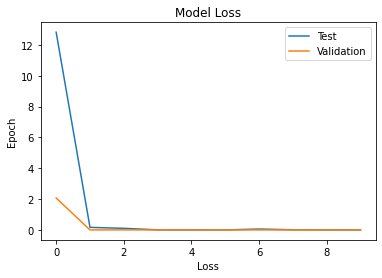

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Loss')
plt.ylabel('Epoch')
plt.legend(['Test','Validation'],loc='upper right')
plt.show()

In [32]:
def names(number):
    if number == 0:
        return 'Non Demented'
    elif number == 1:
        return 'Mild Dementia'
    elif number == 2:
        return 'Moderate Dementia'
    elif number == 3:
        return 'Very Mild Dementia'
    else:
        return 'Error in Prediction'

i am 100.0% sure that This Is Moderate Dementia


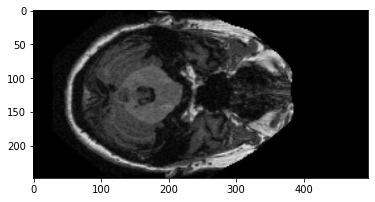

In [34]:
from matplotlib.pyplot import imshow
img = Image.open(r'C:\Users\SDI\Downloads\dementia project\Moderate Dementia\OAS1_0308_MR1_mpr-1_111.jpg')
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res=model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print('i am '+ str(res[0][classification]*100)+ '% sure that This Is '+ names(classification))

100.0% Confidence This Is Non Demented


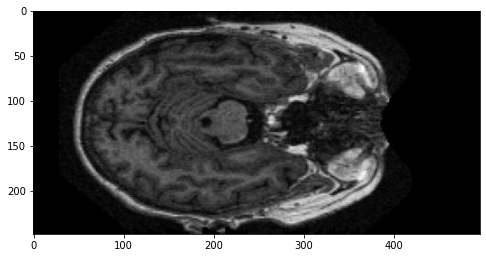

In [86]:
img1 = Image.open(r'C:\Users\SDI\Downloads\dementia project\Non Demented\OAS1_0001_MR1_mpr-1_104.jpg')
x = np.array(img1.resize((128,128)))
x = x.reshape(1,128,128,3)
res=model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img1)
print(str(res[0][classification]*100)+ '% Confidence This Is '+ names(classification))

100.0% Confidence This Is Very Mild Dementia


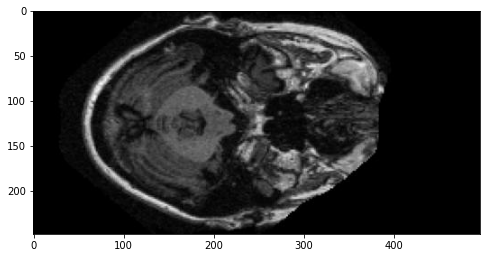

In [84]:
img2 = Image.open(r'C:\Users\SDI\Downloads\dementia project\Very mild Dementia\OAS1_0003_MR1_mpr-1_119.jpg')
x = np.array(img2.resize((128,128)))
x = x.reshape(1,128,128,3)
res=model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img2)
print(str(res[0][classification]*100)+ '% Confidence This Is '+ names(classification))

In [64]:
#pretrained_model = tf.keras.applications.MobileNetV2(include_top=True,weights='imagenet')
#pretrained_model.trainable = False

# ImageNet labels
#decode_predictions = tf.keras.applications.mobilenet_v2.decode_predictions

In [65]:
# Helper function to preprocess the image so that it can be inputted in MobileNetV2
#def preprocess(image):
  #image = tf.cast(image, tf.float32)
  #image = tf.image.resize(image, (224, 224))
  #image = tf.keras.applications.mobilenet_v2.preprocess_input(image)
  #image = image[None, ...]
  #return image

# Helper function to extract labels from probability vector
#def get_imagenet_label(probs):
  #return decode_predictions(probs, top=1)[0][0]

In [66]:
image_raw = tf.io.read_file(r'mildly demented.jpg')
image = tf.image.decode_image(image_raw)

image = preprocess(image)
image_probs = pretrained_model.predict(image)

1/1 [==============================] - 0s 49ms/step


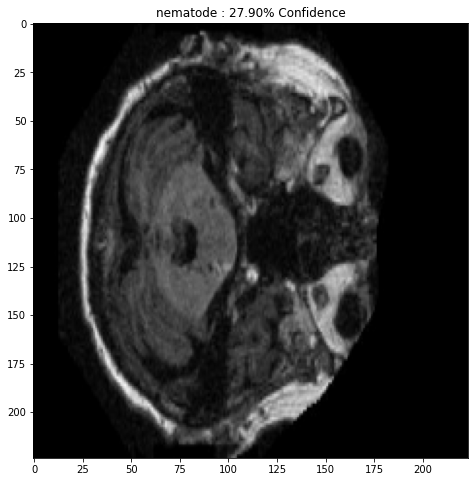

In [67]:
plt.figure()
plt.imshow(image[0] * 0.5 + 0.5)  # To change [-1, 1] to [0,1]
_, image_class, class_confidence = get_imagenet_label(image_probs)
plt.title('{} : {:.2f}% Confidence'.format(image_class, class_confidence*100))
plt.show()

In [68]:
image_raw1 = tf.io.read_file(r'moderately demented.jpg')
image1 = tf.image.decode_image(image_raw1)

image1 = preprocess(image1)
image_probs1 = pretrained_model.predict(image1)

1/1 [==============================] - 0s 55ms/step


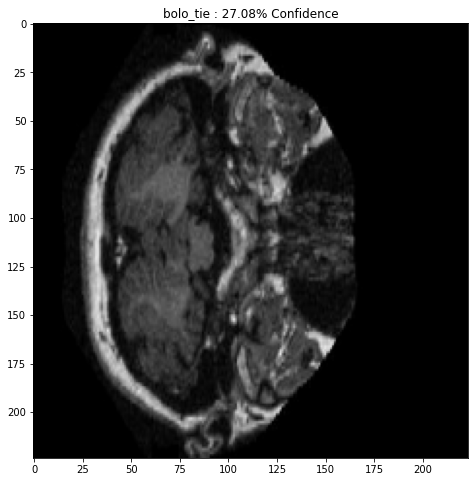

In [69]:
plt.figure()
plt.imshow(image1[0] * 0.5 + 0.5)  # To change [-1, 1] to [0,1]
_, image_class, class_confidence = get_imagenet_label(image_probs1)
plt.title('{} : {:.2f}% Confidence'.format(image_class, class_confidence*100))
plt.show()

In [70]:
image_raw2 = tf.io.read_file(r'non demented.jpg')
image2 = tf.image.decode_image(image_raw2)

image2 = preprocess(image2)
image_probs2 = pretrained_model.predict(image2)

1/1 [==============================] - 0s 53ms/step


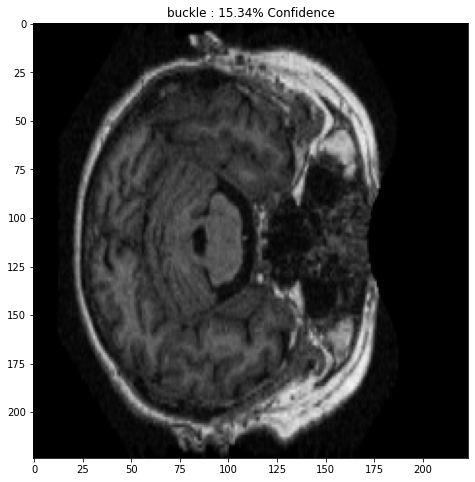

In [71]:
plt.figure()
plt.imshow(image2[0] * 0.5 + 0.5)  # To change [-1, 1] to [0,1]
_, image_class, class_confidence = get_imagenet_label(image_probs2)
plt.title('{} : {:.2f}% Confidence'.format(image_class, class_confidence*100))
plt.show()

In [72]:
image_raw3 = tf.io.read_file(r'very  mild dementia.jpg')
image3 = tf.image.decode_image(image_raw3)

image3 = preprocess(image3)
image_probs3 = pretrained_model.predict(image3)

1/1 [==============================] - 0s 49ms/step


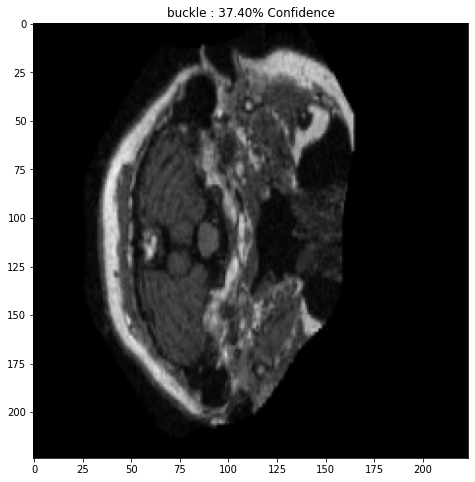

In [73]:
plt.figure()
plt.imshow(image3[0] * 0.5 + 0.5)  # To change [-1, 1] to [0,1]
_, image_class, class_confidence = get_imagenet_label(image_probs3)
plt.title('{} : {:.2f}% Confidence'.format(image_class, class_confidence*100))
plt.show()

In [74]:
loss_object = tf.keras.losses.CategoricalCrossentropy()

def create_adversarial_pattern(input_image, input_label):
  with tf.GradientTape() as tape:
    tape.watch(input_image)
    prediction = pretrained_model(input_image)
    loss = loss_object(input_label, prediction)

  # Get the gradients of the loss w.r.t to the input image.
  gradient = tape.gradient(loss, input_image)
  # Get the sign of the gradients to create the perturbation
  signed_grad = tf.sign(gradient)
  return signed_grad

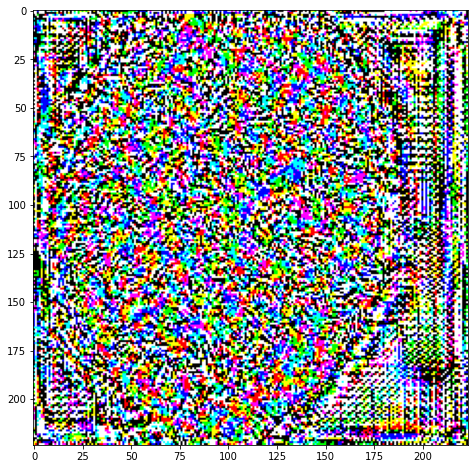

In [77]:
# Get the input label of the image.
Alzheimer_index = 388
label = tf.one_hot(Alzheimer_index, image_probs.shape[-1])
label = tf.reshape(label, (1, image_probs.shape[-1]))

perturbations = create_adversarial_pattern(image, label)
plt.imshow(perturbations[0] * 0.5 + 0.5);  # To change [-1, 1] to [0,1]

In [95]:
def display_images(image, description):
  _, label, confidence = get_imagenet_label(pretrained_model.predict(image))
  plt.figure()
  plt.imshow(image[0]*0.5+0.5)
  plt.title('{} \n {} : {:.2f}% Confidence'.format(description,label, confidence*100))
  plt.show()

1/1 [==============================] - 0s 49ms/step


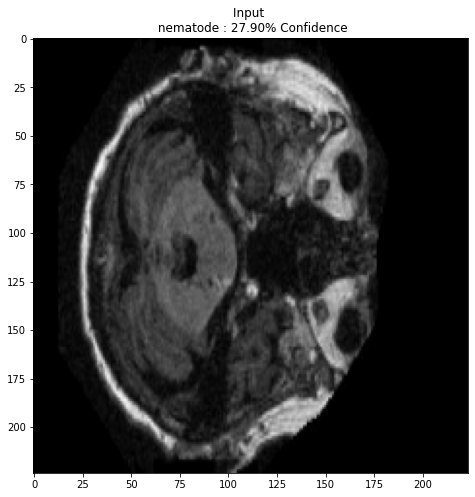

1/1 [==============================] - 0s 50ms/step


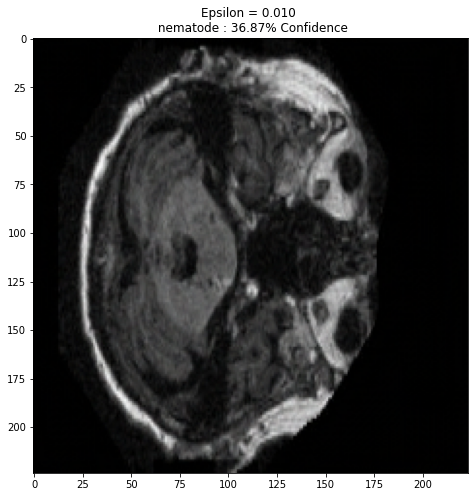

1/1 [==============================] - 0s 47ms/step


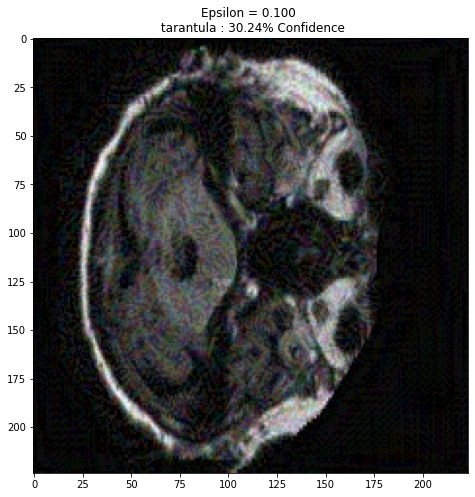

1/1 [==============================] - 0s 46ms/step


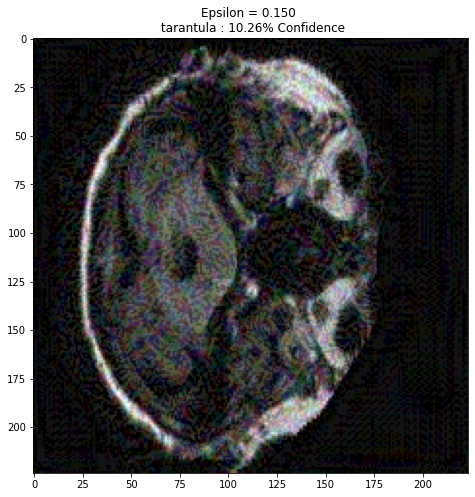

In [96]:
epsilons = [0, 0.01, 0.1, 0.15]
descriptions = [('Epsilon = {:0.3f}'.format(eps) if eps else 'Input') for eps in epsilons]

for i, eps in enumerate(epsilons):
  adv_x = image + eps*perturbations
  adv_x = tf.clip_by_value(adv_x, -1, 1)
  display_images(adv_x, descriptions[i])